In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load Data

In [2]:
input_df = pd.read_csv(r'website-traffic.csv')
input_df['date_of_visit'] = pd.to_datetime(input_df.MonthDay.str.cat(input_df.Year.astype(str), sep=' '))

input_df[['date_of_visit','Visits']].head(10)   

,date_of_visit,Visits
0,2009-06-01,27
1,2009-06-02,31
2,2009-06-03,38
3,2009-06-04,38
4,2009-06-05,31
5,2009-06-06,24
6,2009-06-07,21
7,2009-06-08,29
8,2009-06-09,30
9,2009-06-10,22


# Plot Time Series

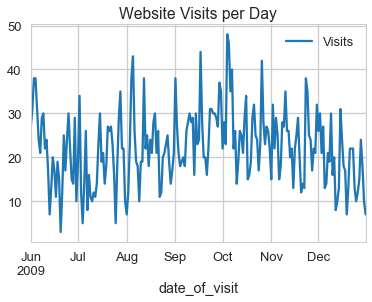

In [3]:
input_df.plot(x='date_of_visit',
              y='Visits', 
              title= "Website Visits per Day")

# Plot Time Series Constituents

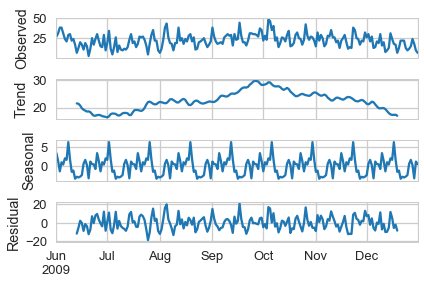

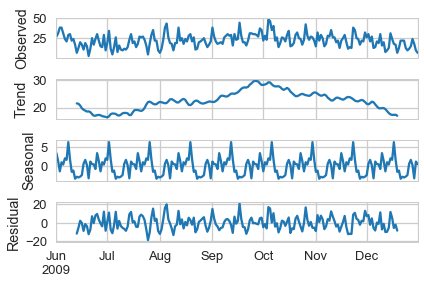

In [7]:
ts_visits = pd.Series(input_df.Visits.values
                      ,index=pd.date_range(
                                            input_df.date_of_visit.min()
                                            , input_df.date_of_visit.max()
                                            , freq='D')
                     )

deompose = seasonal_decompose(ts_visits.interpolate(),
                                freq=24)
deompose.plot()

# Moving Average

In [9]:
input_df['moving_average'] = input_df['Visits'].rolling(window=3,
                                                        center=False).mean()

input_df[['Visits','moving_average']].head(10)

,Visits,moving_average
0,27,NaN
1,31,NaN
2,38,32.000000
3,38,35.666667
4,31,35.666667
5,24,31.000000
6,21,25.333333
7,29,24.666667
8,30,26.666667
9,22,27.000000


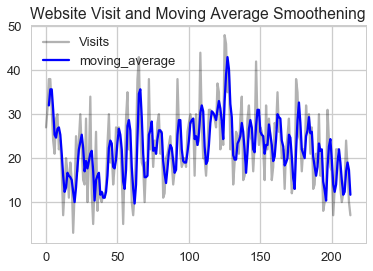

In [10]:
plt.plot(input_df.Visits,'-',color='black',alpha=0.3)
plt.plot(input_df.moving_average,color='b')
plt.title('Website Visit and Moving Average Smoothening')
plt.legend()

# Exponentially Weighted Moving Average (EWMA)

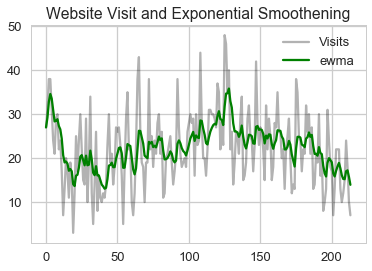

In [11]:
input_df['ewma'] = input_df['Visits'].ewm(halflife=3,
                                            ignore_na=False,
                                            min_periods=0,
                                            adjust=True).mean()

plt.plot(input_df.Visits,'-',color='black',alpha=0.3)
plt.plot(input_df.ewma,color='g')
plt.title('Website Visit and Exponential Smoothening')
plt.legend()